# REAL TIME COMMUNICATION FOR SPECIALLY ABLED PEOPLE

# TEAM ID : PNT2022TMID06649

# IBM WATSON STUDIO DEPLOYMENT CODE 

## 1.INSTALLING THE KERAS AND THE TENSORFLOW

In [3]:
!pip install Keras==2.2.4

     |████████████████████████████████| 312 kB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 19.8 MB/s eta 0:00:01
  Attempting uninstall: Keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.


In [5]:
!pip install tensorflow==2.7

     |████████████████████████████████| 489.7 MB 15 kB/s s eta 0:00:01MB/s eta 0:00:03��████████████████████████▉   | 441.3 MB 95.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 73.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 78.7 MB/s eta 0:00:01██████▏                    | 4.9 MB 78.7 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.2
    Uninstalling tensorflow-2.7.2:
      Successfully uninstalled tensorflow-2.7.2



## 2. IMPORTING LIBRARIES TO BUILD MODEL

In [7]:
#library to train the model
import keras
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D, Flatten

## 3. IMPORTING LIBRARIES FOR IMAGE AUGMENTATION

In [8]:
#image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

## 4.ADDING STREAMING_BODY_OBJECT FOR DATASET.ZIP

In [10]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QnN7uz7Boh-I8-i8SGkACMF3ivzuTwTTCzc0MtbUzj_Y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ibmdeploymentmodel-donotdelete-pr-1ykjd9lriarv2y'
object_key = 'Dataset.zip'

streaming_body_10 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


## 5.UNZIPPING THE DATASET

In [11]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_10.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)


In [12]:
pwd

'/home/wsuser/work'

In [13]:
ls

Dataset/


In [14]:
#checking that the dataset is there are not
import os
filenamer = os.listdir('/home/wsuser/work/Dataset/training_set')

## 6.TRAINING AND TESTING IMAGES UNDER CLASSES

In [15]:
train_data=train_datagen.flow_from_directory("/home/wsuser/work/Dataset/training_set",target_size=(64,64),class_mode="categorical",batch_size=25)

Found 15750 images belonging to 9 classes.


In [16]:
test_data=test_datagen.flow_from_directory("/home/wsuser/work/Dataset/test_set",target_size=(64,64),
class_mode='categorical' , batch_size=25)

Found 2250 images belonging to 9 classes.


## 7. TOTAL CLASSES UNDER TRAINING AND TESTING

In [17]:
train_data.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [18]:
test_data.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [20]:
test_datagen=ImageDataGenerator(rescale=1./255)

## 8. MODEL BUILDING USING CNN

In [22]:
model=Sequential()

In [23]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


## 9. ADDING LAYERS FOR MODEL TRAINING

## HIDDEN LAYERS

In [27]:
model.add(Dense(units = 512, activation='relu'))
#model.add(Dense(unit = 150,init = "uniform" activation='softmax'))

## OUTPUT LAYERS

In [28]:
model.add(Dense(units = 9, activation='softmax'))

## 10. OPTIMIZING THE MODEL 

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:

len(train_data)

630

In [31]:
len(test_data)

90

## 11.FITTING THE MODEL

In [32]:

model.fit_generator(train_data,steps_per_epoch=630,epochs=10,validation_data=test_data,validation_steps=90)


/tmp/wsuser/ipykernel_164/1856899448.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=630,epochs=10,validation_data=test_data,validation_steps=90)


Epoch 1/10
630/630 [==============================] - 103s 163ms/step - loss: 0.1798 - accuracy: 0.9454 - val_loss: 0.3188 - val_accuracy: 0.9631
Epoch 2/10
630/630 [==============================] - 103s 163ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.2864 - val_accuracy: 0.9693
Epoch 3/10
630/630 [==============================] - 102s 162ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.4785 - val_accuracy: 0.9769
Epoch 5/10
630/630 [==============================] - 102s 163ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.4169 - val_accuracy: 0.9804
Epoch 6/10
630/630 [==============================] - 103s 163ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.7369 - val_accuracy: 0.9778
Epoch 7/10
630/630 [==============================] - 102s 161ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 1.0017 - val_accuracy: 0.9760
Epoch 9/10
630/630 [==============================] - 102s 162ms/step - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.7908 -

## 12.SAVING THE MODEL

In [33]:
model.save('My_Model.h5')

## 13.CONVERTING ZIP FILE TO TAR FILE FOR LOCAL USE

In [34]:
#converting the model to tar
!tar -zcvf image-Classification-model-new.tgz My_Model.h5

My_Model.h5


In [35]:
ls -1

Dataset/
image-Classification-model-new.tgz
My_Model.h5


## 14.INSTALLING WATSON MACHINE LEARNING CLIENT SOFTWARE

In [36]:
#installing the machine learning repository
!pip install watson_machine_learning_client --upgrade

     |████████████████████████████████| 538 kB 20.7 MB/s eta 0:00:01


## 15. IMPORTING APICLIENT FOR DEPLOYING

In [37]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":  "njljyonC5Tbeu1BG1SMRnfFCDoqvc_8Cuv42FevQVNTb"
}
client = APIClient(url_credentials)


In [38]:
client = APIClient(url_credentials)

## 16.CREATING API_CLIENT SPACE ID 

In [39]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [40]:
space_uid = guid_from_space_name(client, 'ImageClassification')
print("space UID = " + space_uid)

space UID = 1e07b197-cb87-48f4-80cb-b68c8501442e


In [41]:
client.set.default_space(space_uid)

'SUCCESS'

In [42]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [43]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

## 17.STORING THE MODEL_ID FOR DATASET.H5

In [49]:
model_details = client.repository.store_model(model='image-Classification-model-new.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [50]:
model_id

'81f14e06-839d-4e21-9338-f84c0684669c'

In [51]:
model.save('My_Model.h5')

## 18. SAVING THE DEPLOYED MODEL

In [52]:
client.repository.download(model_id, 'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

## 19. TEST THE MODEL

In [82]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import cv2

## 20. LOADING THE DATASET

In [83]:

model = load_model('/home/wsuser/work/My_Model.h5')

## 21. TESTING ON SEVERAL  IMAGES

In [84]:
cd /home/wsuser/work/Dataset/test_set/

/home/wsuser/work/Dataset/test_set


In [85]:
ls

A/  B/  C/  D/  E/  F/  G/  H/  I/


In [86]:
cd /home/wsuser/work/Dataset/test_set/A/

/home/wsuser/work/Dataset/test_set/A


In [87]:
#img = image.load_img(streaming_body_8,target_size=(64, 64))
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/A/100.png")

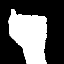

In [88]:
img

In [80]:
img1=image.load_img(r"/home/wsuser/work/Dataset/test_set/A/15.png")


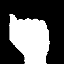

In [89]:
img1

In [90]:
cd /home/wsuser/work/Dataset/test_set/C/

/home/wsuser/work/Dataset/test_set/C


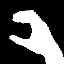

In [66]:
img2

In [ ]:
def get_prediction(num):
  out = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I'}
  return out[num]

In [ ]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/D/180.png", target_size=(128,128), color_mode='grayscale')
img